In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
emission_goals = pd.read_csv('clean_data/emission_goals.csv')
emission_goals

,country,2030,2040,2050,1965.0_all_energy,1966.0_all_energy,1967.0_all_energy,1968.0_all_energy,1969.0_all_energy,1970.0_all_energy,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Global,50-125,5-25,<0,155.690938,164.097213,170.274511,180.646875,192.857279,205.007079,...,31085.534841,31973.369818,32273.531532,32795.554106,32804.718691,32787.197673,32936.066036,33279.491334,34007.891035,34169.000782
1,US,30-130,0-32,<0,52.433795,55.383038,57.311776,60.799094,64.049612,66.215508,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
2,EU,75-80,0-5,<0,42.093184,43.282622,44.509488,47.391263,50.927589,54.195380,...,3922.934995,3800.361504,3737.698716,3653.468215,3445.591925,3486.935193,3498.502547,3527.146451,3466.482504,3330.444758
3,Brazil,0-20,<0,<0,0.969469,1.057605,1.095653,1.252840,1.367832,1.585817,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916
4,India,115-155,5,<0,2.217659,2.285377,2.355911,2.517670,2.790898,2.729549,...,1660.654080,1735.150560,1848.132873,1929.353035,2083.540801,2149.379180,2242.892441,2329.816567,2452.501157,2480.354461
5,China,100-110,0-5,<0,5.516043,5.995001,5.391341,5.445350,6.627664,8.486606,...,8143.438769,8824.313535,9001.257445,9244.003274,9239.855878,9185.990809,9137.626592,9297.988543,9507.109644,9825.801775
6,South Africa,45-377,5-10,<0,1.275199,1.283121,1.336141,1.410133,1.451920,1.517304,...,476.665493,467.761278,463.782634,464.160481,469.114585,451.706682,470.509701,465.805487,470.377753,478.823071
7,Indonesia,50-255,5-30,<0,0.303080,0.300495,0.296711,0.316207,0.357009,0.382341,...,428.016230,480.059094,513.002788,532.869390,486.137994,497.934985,501.997264,526.971609,580.719627,632.085380


In [3]:
list(emission_goals.columns)

['country',
 '2030',
 '2040',
 '2050',
 '1965.0_all_energy',
 '1966.0_all_energy',
 '1967.0_all_energy',
 '1968.0_all_energy',
 '1969.0_all_energy',
 '1970.0_all_energy',
 '1971.0_all_energy',
 '1972.0_all_energy',
 '1973.0_all_energy',
 '1974.0_all_energy',
 '1975.0_all_energy',
 '1976.0_all_energy',
 '1977.0_all_energy',
 '1978.0_all_energy',
 '1979.0_all_energy',
 '1980.0_all_energy',
 '1981.0_all_energy',
 '1982.0_all_energy',
 '1983.0_all_energy',
 '1984.0_all_energy',
 '1985.0_all_energy',
 '1986.0_all_energy',
 '1987.0_all_energy',
 '1988.0_all_energy',
 '1989.0_all_energy',
 '1990.0_all_energy',
 '1991.0_all_energy',
 '1992.0_all_energy',
 '1993.0_all_energy',
 '1994.0_all_energy',
 '1995.0_all_energy',
 '1996.0_all_energy',
 '1997.0_all_energy',
 '1998.0_all_energy',
 '1999.0_all_energy',
 '2000.0_all_energy',
 '2001.0_all_energy',
 '2002.0_all_energy',
 '2003.0_all_energy',
 '2004.0_all_energy',
 '2005.0_all_energy',
 '2006.0_all_energy',
 '2007.0_all_energy',
 '2008.0_all_en

In [4]:
selected_df = emission_goals[emission_goals["country"].isin(["Global", "US", "EU", "India", "China"])]

In [5]:
# Pull out data by suffix
all_energy = selected_df.filter(regex='all_energy$',axis=1).head()
# all_energy.drop_suffix('all_energy')
# Flip the df
all_energyT = all_energy.T
all_energyT = all_energyT.reset_index(drop=False)
# Rename columns
all_energyT = all_energyT.rename(columns={"index":"year", 99: "oil"})
# all_energyT.set_index("year", inplace=True)


allenergy_final = all_energyT.rename(columns={0:'Global', 1:'US', 2:'EU', 4 :'India', 5:'China'})
allenergy_final

,year,Global,US,EU,India,China
0,1965.0_all_energy,155.690938,52.433795,42.093184,2.217659,5.516043
1,1966.0_all_energy,164.097213,55.383038,43.282622,2.285377,5.995001
2,1967.0_all_energy,170.274511,57.311776,44.509488,2.355911,5.391341
3,1968.0_all_energy,180.646875,60.799094,47.391263,2.517670,5.445350
4,1969.0_all_energy,192.857279,64.049612,50.927589,2.790898,6.627664
5,1970.0_all_energy,205.007079,66.215508,54.195380,2.729549,8.486606
6,1971.0_all_energy,213.357154,67.591944,55.464640,2.838043,10.061689
7,1972.0_all_energy,224.932635,71.064330,58.120014,2.987987,10.846553
8,1973.0_all_energy,237.883880,73.984875,61.375230,3.049283,11.449056
9,1974.0_all_energy,239.162833,72.120946,60.366645,3.232547,11.805455


In [6]:
col = allenergy_final['year'] 

col_split1 =[x.split('.') for x in col]
split_df1 = pd.DataFrame(col_split1)
# us_df_new[['years','extra']] = us_df_new[[x.split('.') for x in (us_df_new['year'])]]
split_df1

,0,1
0,1965,0_all_energy
1,1966,0_all_energy
2,1967,0_all_energy
3,1968,0_all_energy
4,1969,0_all_energy
5,1970,0_all_energy
6,1971,0_all_energy
7,1972,0_all_energy
8,1973,0_all_energy
9,1974,0_all_energy


In [7]:
split_df1.iloc[:,0]

0     1965
1     1966
2     1967
3     1968
4     1969
5     1970
6     1971
7     1972
8     1973
9     1974
10    1975
11    1976
12    1977
13    1978
14    1979
15    1980
16    1981
17    1982
18    1983
19    1984
20    1985
21    1986
22    1987
23    1988
24    1989
25    1990
26    1991
27    1992
28    1993
29    1994
30    1995
31    1996
32    1997
33    1998
34    1999
35    2000
36    2001
37    2002
38    2003
39    2004
40    2005
41    2006
42    2007
43    2008
44    2009
45    2010
46    2011
47    2012
48    2013
49    2014
50    2015
51    2016
52    2017
53    2018
54    2019
Name: 0, dtype: object

In [8]:
allenergy_final[['year']]=split_df1.iloc[:,0]
allenergy_final

,year,Global,US,EU,India,China
0,1965,155.690938,52.433795,42.093184,2.217659,5.516043
1,1966,164.097213,55.383038,43.282622,2.285377,5.995001
2,1967,170.274511,57.311776,44.509488,2.355911,5.391341
3,1968,180.646875,60.799094,47.391263,2.517670,5.445350
4,1969,192.857279,64.049612,50.927589,2.790898,6.627664
5,1970,205.007079,66.215508,54.195380,2.729549,8.486606
6,1971,213.357154,67.591944,55.464640,2.838043,10.061689
7,1972,224.932635,71.064330,58.120014,2.987987,10.846553
8,1973,237.883880,73.984875,61.375230,3.049283,11.449056
9,1974,239.162833,72.120946,60.366645,3.232547,11.805455


In [9]:
allenergy_final['year'] = allenergy_final['year'].astype(int)
allenergy_final.head()

,year,Global,US,EU,India,China
0,1965,155.690938,52.433795,42.093184,2.217659,5.516043
1,1966,164.097213,55.383038,43.282622,2.285377,5.995001
2,1967,170.274511,57.311776,44.509488,2.355911,5.391341
3,1968,180.646875,60.799094,47.391263,2.517670,5.445350
4,1969,192.857279,64.049612,50.927589,2.790898,6.627664


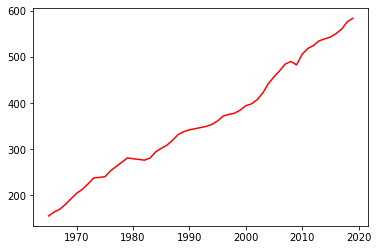

In [10]:
# Check Trends through plots
plt.plot(allenergy_final.year, allenergy_final.Global, 'red')

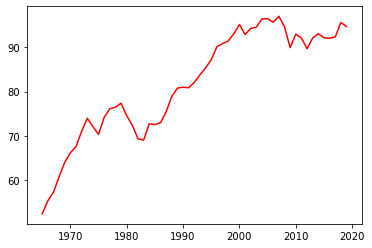

In [11]:
plt.plot(allenergy_final.year, allenergy_final.US, 'red')

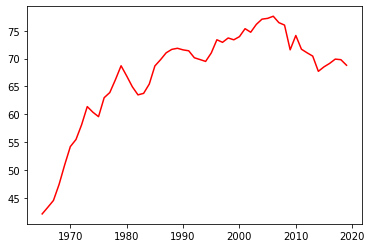

In [12]:
plt.plot(allenergy_final.year, allenergy_final.EU, 'red')

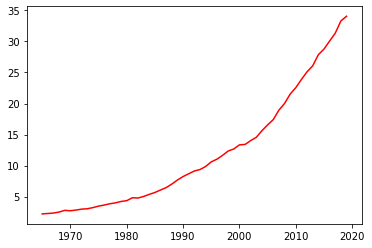

In [13]:
plt.plot(allenergy_final.year, allenergy_final.India, 'red')

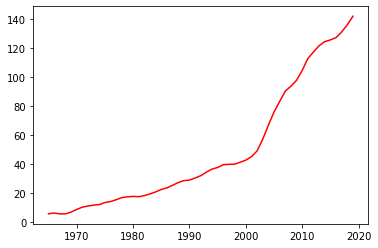

In [14]:
plt.plot(allenergy_final.year, allenergy_final.China, 'red')

### Adjustment for US

In [15]:
# Select most recent trend
us_sele = allenergy_final[allenergy_final["year"] > 2017]
us_sele

,year,Global,US,EU,India,China
53,2018,576.228810,95.602919,69.806435,33.301794,135.770697
54,2019,583.898977,94.648804,68.806269,34.059514,141.699218


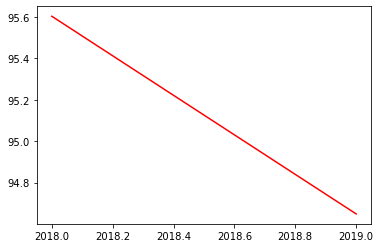

In [16]:
plt.plot(us_sele.year, us_sele.US, 'red')

In [17]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = us_sele.year.values.reshape(-1, 1)
y = us_sele.US.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (2, 1) (2, 1)


In [18]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [20]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2018]]
Max X Value: [[2019]]


In [21]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

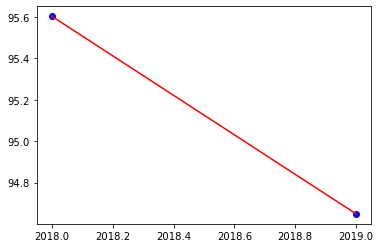

In [22]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [23]:
new_years = [2020, 2030, 2040, 2050]
year_df = pd.DataFrame(new_years, columns = ['year'])
year_df

,year
0,2020
1,2030
2,2040
3,2050


In [24]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [25]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "US": predict_values}

In [26]:
us_predict_df = pd.DataFrame(data_years, columns=["year", 'US'])
us_predict_df

,year,US
0,2020,93.694689
1,2030,84.153539
2,2040,74.612390
3,2050,65.071240


### Adjustment for EU

In [27]:
# Select most recent trend
eu_sele = allenergy_final[allenergy_final["year"] > 2005]
eu_sele

,year,Global,US,EU,India,China
41,2006,470.143289,95.658362,77.612314,17.410174,82.880534
42,2007,484.669077,96.996458,76.459088,18.929109,90.087819
43,2008,490.227923,94.600712,76.023594,20.004817,93.444969
44,2009,482.815643,89.924018,71.580067,21.524347,97.523147
45,2010,506.024137,92.972589,74.152190,22.554708,104.284002
46,2011,518.310827,92.088362,71.688762,23.880450,112.540808
47,2012,524.981692,89.687765,71.043914,25.113414,117.045350
48,2013,534.907946,92.095480,70.449605,26.076945,121.374657
49,2014,539.249792,93.054168,67.712970,27.861675,124.197933
50,2015,543.174900,92.149004,68.517875,28.770819,125.376891


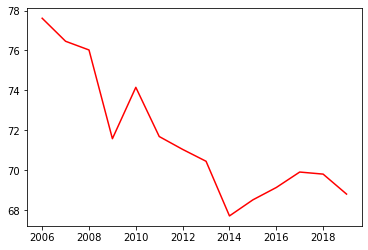

In [28]:
plt.plot(eu_sele.year, eu_sele.EU, 'red')

In [29]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = eu_sele.year.values.reshape(-1, 1)
y = eu_sele.EU.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (14, 1) (14, 1)


In [30]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [31]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Min X Value: [[2006]]
Max X Value: [[2019]]


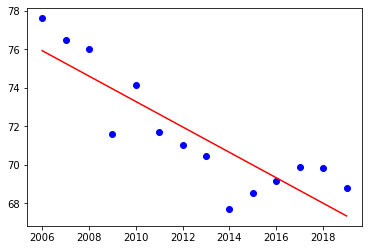

In [32]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [33]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [34]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "EU": predict_values}

In [35]:
eu_predict_df = pd.DataFrame(data_years, columns=["year", 'EU'])
eu_predict_df

,year,EU
0,2020,66.682708
1,2030,60.078761
2,2040,53.474815
3,2050,46.870869


### Adjustment for India

In [36]:
# Select most recent trend
india_sele = allenergy_final[allenergy_final["year"] > 2000]
india_sele

,year,Global,US,EU,India,China
36,2001,398.452334,92.894525,75.378675,13.410957,44.841977
37,2002,407.181976,94.239018,74.740081,14.028568,48.844607
38,2003,421.737396,94.535033,76.153593,14.568021,56.875222
39,2004,442.230196,96.396714,77.088503,15.629661,66.545716
40,2005,457.076754,96.437314,77.230816,16.562908,75.601720
41,2006,470.143289,95.658362,77.612314,17.410174,82.880534
42,2007,484.669077,96.996458,76.459088,18.929109,90.087819
43,2008,490.227923,94.600712,76.023594,20.004817,93.444969
44,2009,482.815643,89.924018,71.580067,21.524347,97.523147
45,2010,506.024137,92.972589,74.152190,22.554708,104.284002


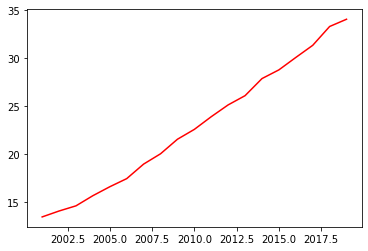

In [37]:
plt.plot(india_sele.year, india_sele.India, 'red')

In [38]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = india_sele.year.values.reshape(-1, 1)
y = india_sele.India.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (19, 1) (19, 1)


In [39]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [41]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[2001]]
Max X Value: [[2019]]


In [42]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

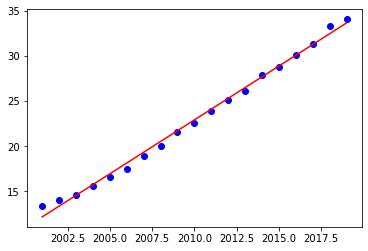

In [43]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [44]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [45]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "India": predict_values}

In [46]:
india_predict_df = pd.DataFrame(data_years, columns=["year", 'India'])
india_predict_df

,year,India
0,2020,34.844686
1,2030,46.789905
2,2040,58.735124
3,2050,70.680343


### Adjustment for China

In [47]:
# Select most recent trend
china_sele = allenergy_final[allenergy_final["year"] > 2000]
china_sele

,year,Global,US,EU,India,China
36,2001,398.452334,92.894525,75.378675,13.410957,44.841977
37,2002,407.181976,94.239018,74.740081,14.028568,48.844607
38,2003,421.737396,94.535033,76.153593,14.568021,56.875222
39,2004,442.230196,96.396714,77.088503,15.629661,66.545716
40,2005,457.076754,96.437314,77.230816,16.562908,75.601720
41,2006,470.143289,95.658362,77.612314,17.410174,82.880534
42,2007,484.669077,96.996458,76.459088,18.929109,90.087819
43,2008,490.227923,94.600712,76.023594,20.004817,93.444969
44,2009,482.815643,89.924018,71.580067,21.524347,97.523147
45,2010,506.024137,92.972589,74.152190,22.554708,104.284002


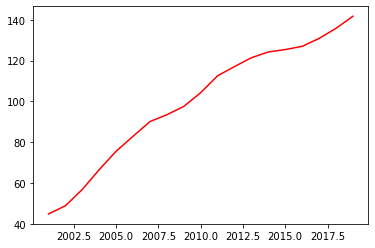

In [48]:
plt.plot(china_sele.year, china_sele.China, 'red')

In [49]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = china_sele.year.values.reshape(-1, 1)
y = china_sele.China.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (19, 1) (19, 1)


In [50]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit(renew_X, ln_Y)
model.fit(X, y)

LinearRegression()

In [51]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

# Calculate the y_min and y_max using model.predict and x_min and x_max
# y_min = model.predict(x_min)
# y_max = model.predict(x_max)
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Min X Value: [[2001]]
Max X Value: [[2019]]


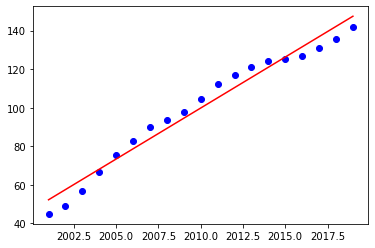

In [52]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [53]:
# Predictions
predict_2020 = model.predict([[2020]])
predict_2020 = list(predict_2020[0])
predict_2020 = predict_2020[0]

predict_2030 = model.predict([[2030]])
predict_2030 = list(predict_2030[0])
predict_2030 = predict_2030[0]

predict_2040 = model.predict([[2040]])
predict_2040 = list(predict_2040[0])
predict_2040 = predict_2040[0]

predict_2050 = model.predict([[2050]])
predict_2050 = list(predict_2050[0])
predict_2050 = predict_2050[0]

In [54]:
predict_values = [predict_2020, predict_2030, predict_2040, predict_2050]
data_years = {"year":new_years,
           "China": predict_values}

In [55]:
china_predict_df = pd.DataFrame(data_years, columns=["year", 'China'])
china_predict_df

,year,China
0,2020,152.765389
1,2030,205.703530
2,2040,258.641670
3,2050,311.579810


In [56]:
# Export the predictions
us_predict_df.to_csv('us_allenergy_adjust_recent.csv', encoding='utf-8')
eu_predict_df.to_csv('eu_allenergy_adjust_recent.csv', encoding='utf-8')
india_predict_df.to_csv('india_allenergy_adjust_recent.csv', encoding='utf-8')
china_predict_df.to_csv('china_allenergy_adjust_recent.csv', encoding='utf-8')